In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:

# Sample data
cancer_types = ['Lung', 'Breast', 'Colorectal', 'Prostate', 'Leukemia']
chemotherapy_types = ['Type A', 'Type B', 'Type C']
side_effects = ['Nausea', 'Fatigue', 'Hair Loss', 'Diarrhea', 'None']
survival_status = ['Survived', 'Did not survive']

# Generate synthetic data
data = {
    'Patient_ID': [f"P{i+1}" for i in range(500)],
    'Age': [random.randint(30, 80) for _ in range(500)],
    'Gender': [random.choice(['Male', 'Female']) for _ in range(500)],
    'Cancer_Type': [random.choice(cancer_types) for _ in range(500)],
    'Chemotherapy_Type': [random.choice(chemotherapy_types) for _ in range(500)],
    'Side_Effects': [random.choice(side_effects) for _ in range(500)],
    'Survival_Status': [random.choice(survival_status) for _ in range(500)]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("downloads/chemotherapy_survival_data.csv", index=False)


In [7]:
# Display the first few records
print("Synthetic Chemotherapy Survival Dataset:")
print(df.head(15))

Synthetic Chemotherapy Survival Dataset:
   Patient_ID  Age  Gender Cancer_Type Chemotherapy_Type Side_Effects  \
0          P1   45    Male    Leukemia            Type C         None   
1          P2   39    Male      Breast            Type A       Nausea   
2          P3   58    Male    Prostate            Type C       Nausea   
3          P4   69  Female  Colorectal            Type B    Hair Loss   
4          P5   78    Male    Prostate            Type C      Fatigue   
5          P6   39    Male      Breast            Type B     Diarrhea   
6          P7   53    Male        Lung            Type B    Hair Loss   
7          P8   62  Female    Leukemia            Type C    Hair Loss   
8          P9   51  Female        Lung            Type A       Nausea   
9         P10   53    Male    Prostate            Type C       Nausea   
10        P11   71  Female    Leukemia            Type C      Fatigue   
11        P12   73  Female        Lung            Type C      Fatigue   
12        

In [9]:
# Check for missing values
print("\nMissing Values in the Dataset:")
print(df.isnull().sum())


Missing Values in the Dataset:
Patient_ID           0
Age                  0
Gender               0
Cancer_Type          0
Chemotherapy_Type    0
Side_Effects         0
Survival_Status      0
dtype: int64


In [11]:
# Convert categorical columns to category type for efficiency
categorical_cols = ['Gender', 'Cancer_Type', 'Chemotherapy_Type', 'Side_Effects', 'Survival_Status']
for col in categorical_cols:
    df[col] = df[col].astype('category')

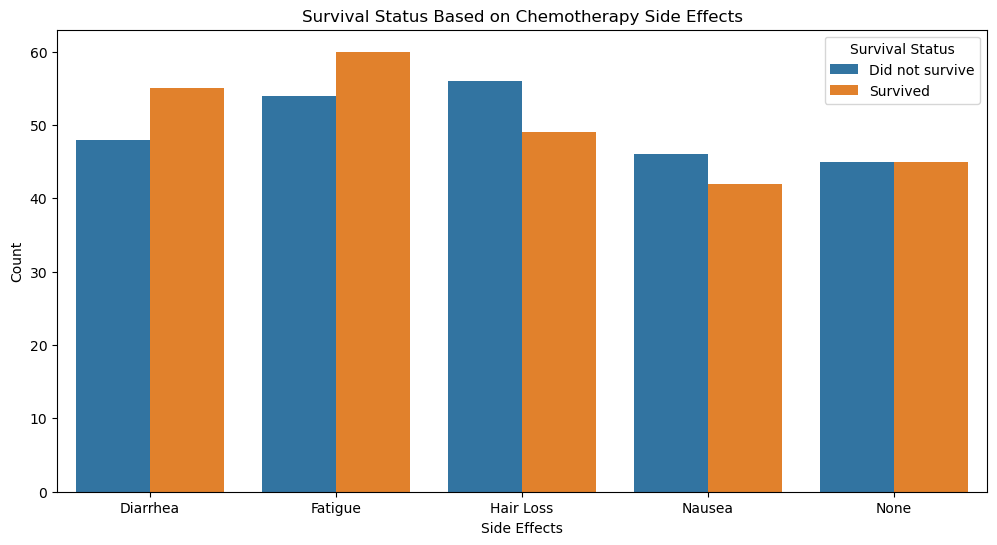

In [13]:
# Countplot for Side Effects vs Survival Status
plt.figure(figsize=(12, 6))
sns.countplot(x='Side_Effects', hue='Survival_Status', data=df)
plt.title('Survival Status Based on Chemotherapy Side Effects')
plt.xlabel('Side Effects')
plt.ylabel('Count')
plt.legend(title='Survival Status')
plt.show()


In [15]:
# Survival rate by side effects
survival_rate = df.groupby('Side_Effects')['Survival_Status'].value_counts(normalize=True).unstack().fillna(0)
survival_rate = survival_rate.rename(columns={"Survived": "Survival Rate", "Did not survive": "Non-Survival Rate"})
print("\nSurvival Rate based on Side Effects:")
print(survival_rate)

C:\Users\91916\AppData\Local\Temp\ipykernel_11304\3894692306.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate = df.groupby('Side_Effects')['Survival_Status'].value_counts(normalize=True).unstack().fillna(0)



Survival Rate based on Side Effects:
Survival_Status  Non-Survival Rate  Survival Rate
Side_Effects                                     
Diarrhea                  0.466019       0.533981
Fatigue                   0.473684       0.526316
Hair Loss                 0.533333       0.466667
Nausea                    0.522727       0.477273
None                      0.500000       0.500000


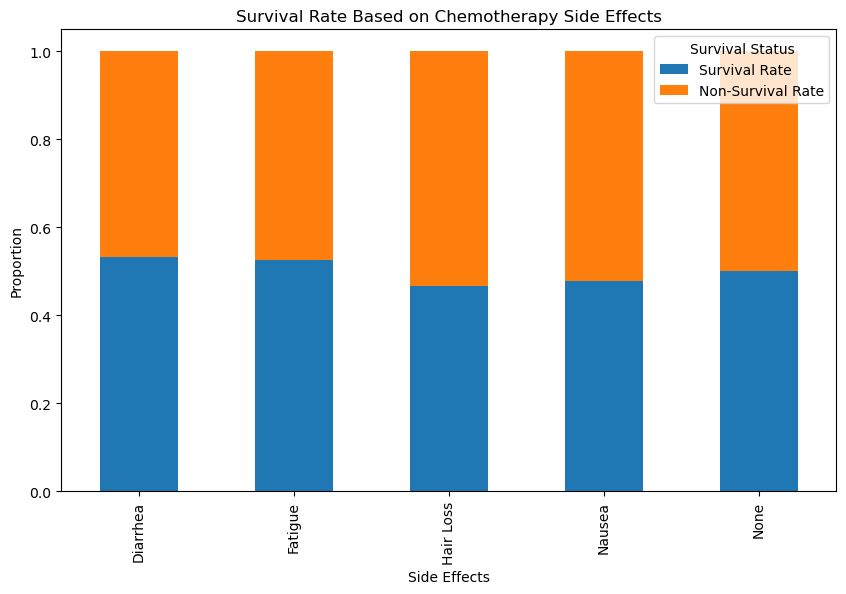

In [17]:
# Plotting survival rates
survival_rate[['Survival Rate', 'Non-Survival Rate']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Survival Rate Based on Chemotherapy Side Effects')
plt.xlabel('Side Effects')
plt.ylabel('Proportion')
plt.legend(title='Survival Status')
plt.show()

In [19]:
# Analyzing survival rates
survival_summary = df.groupby(['Side_Effects', 'Survival_Status']).size().unstack().fillna(0)
survival_summary['Total'] = survival_summary.sum(axis=1)
survival_summary['Survival Rate'] = survival_summary['Survived'] / survival_summary['Total'] * 100
print("\nSurvival Summary based on Side Effects:")
print(survival_summary[['Survived', 'Did not survive', 'Total', 'Survival Rate']])


Survival Summary based on Side Effects:
Survival_Status  Survived  Did not survive  Total  Survival Rate
Side_Effects                                                    
Diarrhea               55               48    103      53.398058
Fatigue                60               54    114      52.631579
Hair Loss              49               56    105      46.666667
Nausea                 42               46     88      47.727273
None                   45               45     90      50.000000


C:\Users\91916\AppData\Local\Temp\ipykernel_11304\1743462347.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_summary = df.groupby(['Side_Effects', 'Survival_Status']).size().unstack().fillna(0)
